# DataSet link 
https://www.kaggle.com/datasets/esraaaabdelrazek/mail-data

# importing Dependencies

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import  accuracy_score

# Data Collection & Pre-processing

In [2]:
full_data = pd.read_csv("mail_data.csv")

In [3]:
full_data.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Data Cleaning

In [4]:
# replace the null values with null string 
mail_data = full_data.where((pd.notnull(full_data)), '')

In [5]:
mail_data.head(4)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...


In [6]:
mail_data.shape

(5572, 2)

# 1. label encoding

In [7]:
# label spam mail as 0 ; and ham as 1;
"""mail_data.loc[mail_data['Category'] == 'spam' , 'Category'] = 0
mail_data.loc[mail_data['Category'] == 'ham' , 'Category'] = 1"""

"mail_data.loc[mail_data['Category'] == 'spam' , 'Category'] = 0\nmail_data.loc[mail_data['Category'] == 'ham' , 'Category'] = 1"

In [8]:
# label spam mail as 0 ; and ham as 1;
mail_data['Category'] = mail_data['Category'].map({'spam': 0, 'ham': 1})


In [9]:
mail_data.head(2)

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...


# 2. Missing Values Handling 

In [10]:
mail_data.isnull().sum()

Category    0
Message     0
dtype: int64

# 3. Duplicates

In [46]:
mail_data.drop_duplicates()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will ü b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


#  Exploratory Data Analysis (EDA)

# 1. Spam or non-spam pie chart 

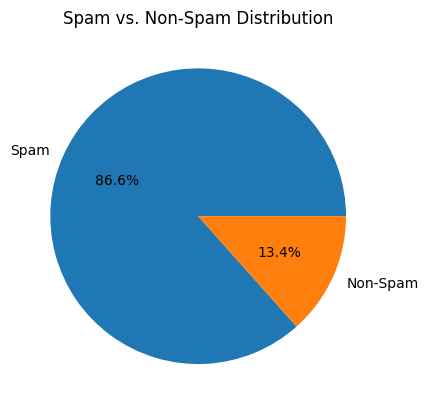

In [12]:
# Spam or non-spam pie chart 
import matplotlib.pyplot as plt

# a DataFrame 'mail_data' with a 'Category' column (0 for spam, 1 for non-spam)
spam_counts = mail_data['Category'].value_counts()
labels = ['Spam', 'Non-Spam']

plt.pie(spam_counts, labels=labels, autopct='%1.1f%%')
plt.title('Spam vs. Non-Spam Distribution')
plt.show()


# 2. character , word , Sentence Count

In [13]:
def get_character_count(text):
    return len(text)

def get_word_count(text):
    return len(text.split())

def get_sentence_count(text):
    sentences = text.split('.')
    return len(sentences)

user_value = int(input("Enter value to see "))
email_text = mail_data['Message'].iloc[user_value]  
char_count = get_character_count(email_text)
word_count = get_word_count(email_text)
sentence_count = get_sentence_count(email_text)

print(f"Character count: {char_count}")
print(f"Word count: {word_count}")
print(f"Sentence count: {sentence_count}")


Enter value to see  20


Character count: 41
Word count: 8
Sentence count: 1


#  Seprating data and label 

In [14]:
# seprating data and label 
X = mail_data['Message']
Y = mail_data['Category']

In [15]:
print(X)
print("---"*20)
print(Y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object
------------------------------------------------------------
0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: int64


In [16]:
print(X.shape)
print("--"*20)
print(Y.shape)

(5572,)
----------------------------------------
(5572,)


In [17]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , random_state=5 , test_size = 0.2)

In [18]:
print("X_training Data Shape" , X_train.shape)
print("---*---*"*5)
print("X_testing Data Shape " , X_test.shape)
print("---*---*"*5)
print("Y_training data shape",Y_train.shape)
print("---*---*"*5)
print("Y_testing data shape" , Y_test.shape)

X_training Data Shape (4457,)
---*---*---*---*---*---*---*---*---*---*
X_testing Data Shape  (1115,)
---*---*---*---*---*---*---*---*---*---*
Y_training data shape (4457,)
---*---*---*---*---*---*---*---*---*---*
Y_testing data shape (1115,)


# Feature Extraction

In [19]:
# transfer the text data into feature vector so that it can be used in logistic regression
feature_extraction = TfidfVectorizer(min_df = 1 , stop_words = 'english' , lowercase = True)

In [20]:
feature_extraction

TfidfVectorizer(stop_words='english')

In [21]:
X_train_features = feature_extraction.fit_transform(X_train)

In [22]:
X_test_features = feature_extraction.transform(X_test)

In [23]:
# Convert Y_train and Y_test to integers
Y_train  =  Y_train.astype('int')
Y_test = Y_test.astype('int')

In [24]:
print("X_train feature data is " , X_train_features)

X_train feature data is    (0, 3916)	0.6037953148318957
  (0, 3056)	0.3429005562464134
  (0, 4893)	0.6433735801583021
  (0, 3068)	0.32236758935606574
  (1, 5720)	0.6023019309762907
  (1, 6542)	0.5742615392242952
  (1, 3970)	0.2895925989409213
  (1, 6110)	0.4728553638784458
  (2, 53)	0.2275977849591067
  (2, 5502)	0.16144032675968542
  (2, 1582)	0.2275977849591067
  (2, 6557)	0.21161850376233796
  (2, 260)	0.19690190061164803
  (2, 4387)	0.1624258510707269
  (2, 4347)	0.2040320228676743
  (2, 2878)	0.4232962626786592
  (2, 434)	0.2587500279452028
  (2, 2182)	0.27253511506960687
  (2, 4988)	0.1604825674220973
  (2, 1850)	0.21615833183721392
  (2, 453)	0.2587500279452028
  (2, 4630)	0.18805274167090552
  (2, 4587)	0.16079883210369647
  (2, 7099)	0.14954143140130233
  (2, 635)	0.29610087716103933
  :	:
  (4454, 2954)	0.5425177822436338
  (4454, 4823)	0.5172606639045361
  (4454, 3557)	0.5172606639045361
  (4454, 3064)	0.41298579528057155
  (4455, 5046)	0.5672102378436935
  (4455, 5597)	0.56

In [25]:
print("X_test feature data is " , X_test_features)

X_test feature data is    (0, 6899)	0.2846292447250661
  (0, 6221)	0.23325359877184784
  (0, 5920)	0.21308623130535415
  (0, 5207)	0.23122407917377785
  (0, 5083)	0.22748305109015973
  (0, 3468)	0.23540619276171187
  (0, 2637)	0.23325359877184784
  (0, 1829)	0.2142899712083444
  (0, 1773)	0.17610740513694134
  (0, 1380)	0.23122407917377785
  (0, 796)	0.2107946667800347
  (0, 637)	0.2846292447250661
  (0, 507)	0.29484395092193777
  (0, 356)	0.2647590080844105
  (0, 157)	0.3092407707067434
  (0, 29)	0.3092407707067434
  (1, 6646)	0.5296040393655135
  (1, 6565)	0.6753213071437494
  (1, 5604)	0.5132842230240372
  (2, 7273)	0.19188099636765857
  (2, 7157)	0.2783719475618076
  (2, 6968)	0.24109430737692425
  (2, 6796)	0.21621294078661296
  (2, 5920)	0.22404234566464956
  (2, 5209)	0.19404580930125934
  :	:
  (1111, 2420)	0.6479775605087087
  (1112, 5718)	0.36829029784822664
  (1112, 5276)	0.3647397343460679
  (1112, 5013)	0.4568329450944841
  (1112, 3490)	0.5752405839777922
  (1112, 3221)	0.

# Model Training

# 1.LogisticRegression

In [26]:
model = LogisticRegression()

In [27]:
model.fit(X_train_features , Y_train)

LogisticRegression()

# Model Evaluation 

In [28]:
# prediciton on training data 
prediction_on_training_data = model.predict(X_train_features)

In [29]:
Accuracy = accuracy_score(prediction_on_training_data , Y_train )

In [30]:
print("Accuracy of the model is", Accuracy)

Accuracy of the model is 0.9676912721561588


# prediciton on testing data 

In [31]:
# prediciton on testing data 
prediction_on_testing_data = model.predict(X_test_features)

In [32]:
Accuracy = accuracy_score(prediction_on_testing_data , Y_test)
print("Accuracy of the model is", Accuracy)

Accuracy of the model is 0.9605381165919282


# 2.Decision Tree

In [33]:
clf = DecisionTreeClassifier(criterion='gini', min_samples_leaf=30, random_state=0)
clf.fit(X_train_features, Y_train)

DecisionTreeClassifier(min_samples_leaf=30, random_state=0)

In [34]:
# using training data 
y_pred = clf.predict(X_train_features)

In [35]:
Accuracy = accuracy_score(y_pred , Y_train )

In [36]:
print("Accuracy of the model is", Accuracy)

Accuracy of the model is 0.941440430783038


# prediciton on testing data 

In [37]:
# using testing data 
y_pred = clf.predict(X_test_features)

In [38]:
Accuracy = accuracy_score(y_pred , Y_test )

In [39]:
print("Accuracy of the model is", Accuracy)

Accuracy of the model is 0.9363228699551569


# Building a predictive system 

In [44]:
input_mail = ["""Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to 
receive entry question(std txt rate)T&C's apply 08452810075over18's"""]

input_data_features  = feature_extraction.transform(input_mail)

prediction = model.predict(input_data_features)
# print(prediction)

if prediction[0] == 1:
    print('Ham Mail')
else: 
    print('Spam Mail')

Spam Mail
